# Exploratory Data Analysis: Bad Loan Prediction

This notebook conducts a comprehensive Exploratory Data Analysis (EDA) on the loan dataset. The goal is to uncover insights and relationships within the data that could be useful for building a model to predict loan defaults (`bad_flag`).

**Steps:**
1.  Initial Data Load and Inspection
2.  Data Load and Cleaning: Load the dataset, correct data types, and handle missing values.
3.  Univariate Analysis: Analyze the distribution of individual features.
4.  Bivariate Analysis: Explore the relationship between features and the target variable.
5.  Correlation Analysis: Examine the linear relationships between numerical features.
6.  Summary of Findings: Consolidate key insights from the analysis.

---



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style('whitegrid')

## Initial Data Load and Inspection



In [3]:
#Initial inspection of data
loan_training_preview = pd.read_csv('training_loan_data.csv', nrows=5)

print("--- Inspecting the file using pandas.read_csv(nrows=5) ---")
display(loan_training_preview)

--- Inspecting the file using pandas.read_csv(nrows=5) ---


,Data derived from a public source,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
1,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000,NaN,debt_consolidation,...,0,17,72%,4000,NaN,3828.953801,5759,1,99,0
2,10000002,12002921,27050,36 months,10.99%,10+ years,OWN,55000,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0,8,61.20%,35700,NaN,34359.94073,114834,1,353,0
3,10000003,11983096,12000,36 months,10.99%,4 years,RENT,60000,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1,3,24%,18100,NaN,16416.61776,7137,1,157,0
4,10000004,12003142,28000,36 months,7.62%,5 years,MORTGAGE,325000,NaN,debt_consolidation,...,1,3,54.60%,42200,NaN,38014.14976,799592,1,365,0


In [4]:
# Load the dataset
# Skip the first row as the first line is a short description instead of a proper header
loan_training = pd.read_csv('training_loan_data.csv', skiprows=1)

# --- 1. Initial Data Loading and Inspection ---
print("--- Initial Data Inspection ---")
print("First 5 rows of the raw data:")
display(loan_training.head())

print("\nInformation about the raw data, including data types and non-null counts:")
loan_training.info()

--- Initial Data Inspection ---
First 5 rows of the raw data:


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0



Information about the raw data, including data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-nu

## Data Load and Cleaning


In [5]:
# --- Correct Data Types and Normalize Percentages ---
# We first convert each column to string type to ensure the .str accessor works on all values, including potential NaNs.
loan_training['int_rate'] = loan_training['int_rate'].astype(str).str.replace('%', '').astype(float) / 100.0
loan_training['revol_util'] = loan_training['revol_util'].astype(str).str.replace('%', '').astype(float) / 100.0
loan_training['term'] = loan_training['term'].astype(str).str.replace(' months', '').astype(float)
loan_training['emp_length'] = loan_training['emp_length'].astype(str).str.replace(' years', '').str.replace(' year', '').str.replace('+', '').str.replace('< 1', '0')
# Use errors='coerce' to automatically handle any strings that can't be converted (like 'nan'), turning them into NaN.
loan_training['emp_length'] = pd.to_numeric(loan_training['emp_length'], errors='coerce')

# Normalize percentage columns which are already numeric.
loan_training['percent_bc_gt_75'] = loan_training['percent_bc_gt_75'] / 100.0
loan_training['bc_util'] = loan_training['bc_util'] / 100.0
loan_training['dti'] = loan_training['dti'] / 100.0

# --- Handle Missing Values ---
cols_to_drop = ['desc', 'mths_since_last_major_derog']
cols_that_exist = [col for col in cols_to_drop if col in loan_training.columns]
if cols_that_exist:
    loan_training.drop(columns=cols_that_exist, inplace=True)
    print(f"Dropped columns: {cols_that_exist}")

# Impute numerical columns with the median.
for col in ['member_id', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal', 'bad_flag', 'emp_length', 'int_rate']:
    loan_training[col].fillna(loan_training[col].median(), inplace=True)

# Impute categorical columns with the mode.
for col in ['term', 'home_ownership', 'purpose']:
    loan_training[col].fillna(loan_training[col].mode()[0], inplace=True)

print("\nProcessed loan training data:")
loan_training.info()

print("\nPreview of loan training data after cleaning and imputations:")
display(loan_training.head())

Dropped columns: ['desc', 'mths_since_last_major_derog']

Processed loan training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         199121 non-null  int64  
 1   member_id                  199121 non-null  float64
 2   loan_amnt                  199121 non-null  int64  
 3   term                       199121 non-null  float64
 4   int_rate                   199121 non-null  float64
 5   emp_length                 199121 non-null  float64
 6   home_ownership             199121 non-null  object 
 7   annual_inc                 199121 non-null  float64
 8   purpose                    199121 non-null  object 
 9   percent_bc_gt_75           199121 non-null  float64
 10  bc_util                    199121 non-null  float64
 11  dti                        199121 non-null  float64
 12

/tmp/ipython-input-3254027542.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_training[col].fillna(loan_training[col].median(), inplace=True)
/tmp/ipython-input-3254027542.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,...,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36.0,0.1624,3.0,RENT,28000.0,debt_consolidation,1.000,...,0.0840,0.0,17.0,0.720,4000.0,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36.0,0.1099,10.0,OWN,55000.0,debt_consolidation,0.250,...,0.2287,0.0,8.0,0.612,35700.0,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36.0,0.1099,4.0,RENT,60000.0,debt_consolidation,0.000,...,0.0462,1.0,3.0,0.240,18100.0,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36.0,0.0762,5.0,MORTGAGE,325000.0,debt_consolidation,0.167,...,0.1855,1.0,3.0,0.546,42200.0,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36.0,0.1353,10.0,RENT,40000.0,debt_consolidation,0.333,...,0.1694,0.0,17.0,0.688,7000.0,6471.462236,13605.0,1,157,0.0


This EDA follows a logical, bottom-up approach, which is a best practice in data science. We start simple and build up to more complex insights:

* **Univariate Analysis:** We need to first understand each feature by itself.
* **Bivariate Analysis:** Here, we see how features interact in pairs, most importantly with our target variable (`bad_flag`). This helps us identify which features are likely to be good predictors.
* **Correlation Analysis:** This is a specific type of bivariate analysis that quickly shows us the linear relationships between all numerical features.
* **Multivariate Analysis:** While our foundational analysis gave us great insights into individual features and pairs of features, multivariate analysis lets us explore how three or more variables interact simultaneously.

##Univariate Analysis


--- Numerical Variable Distributions ---


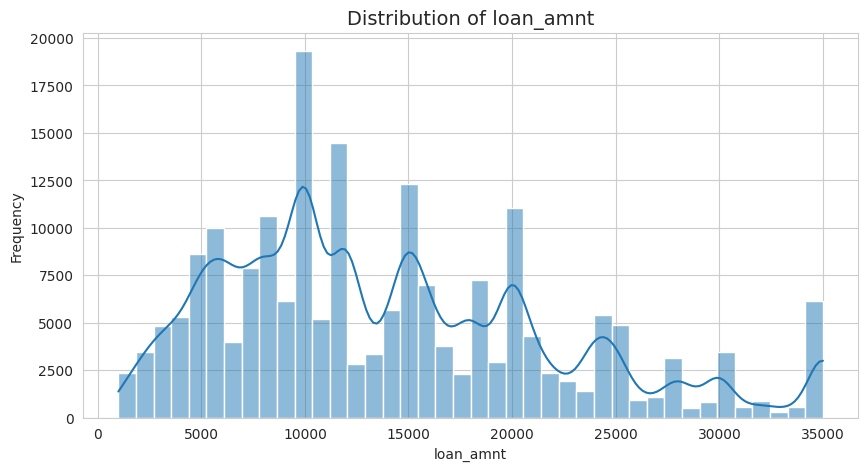

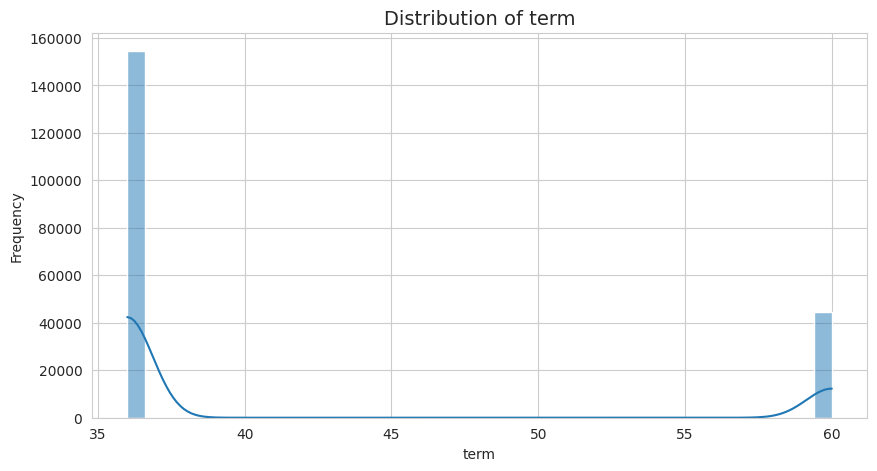

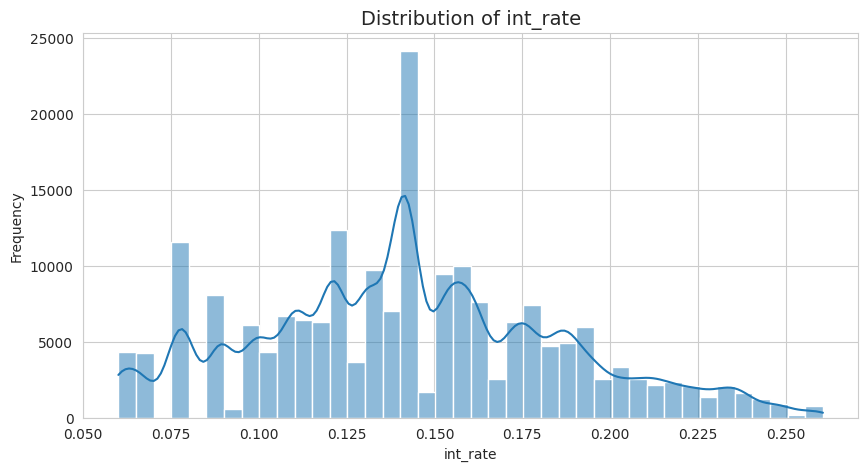

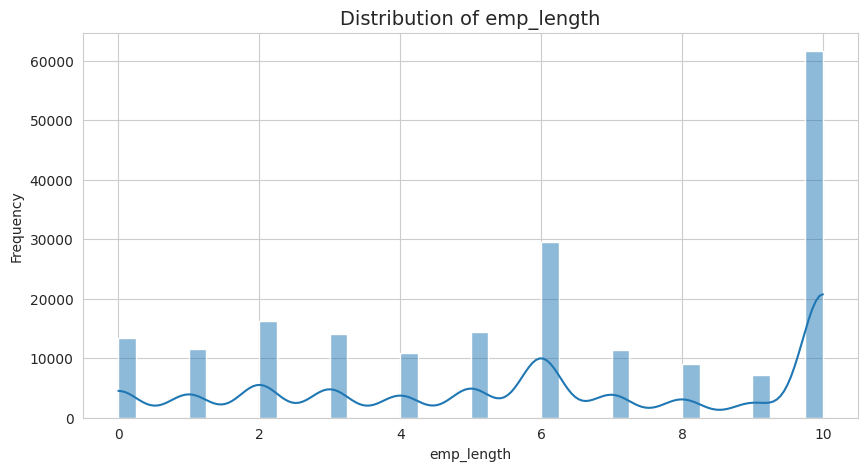

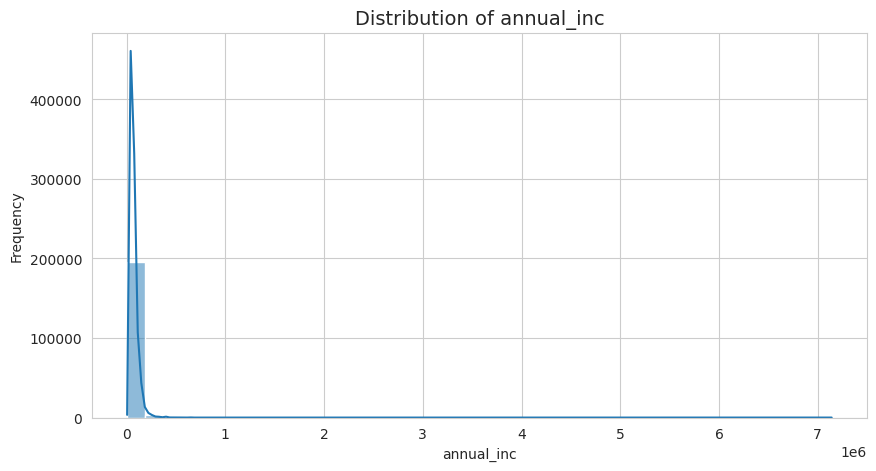

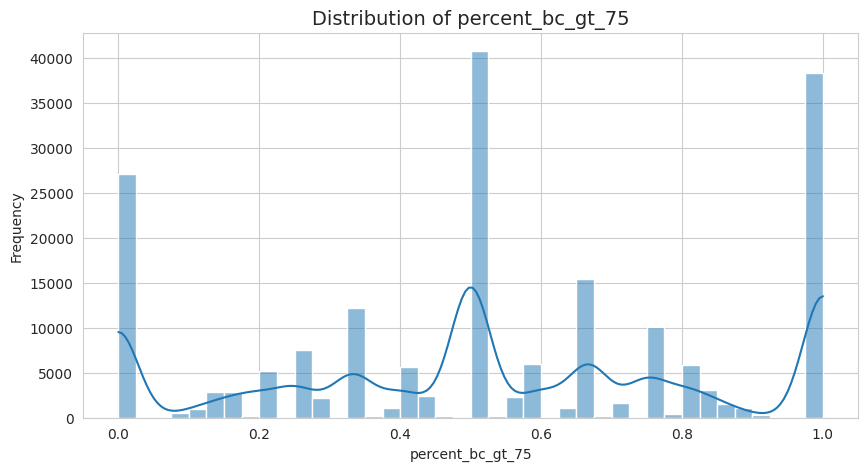

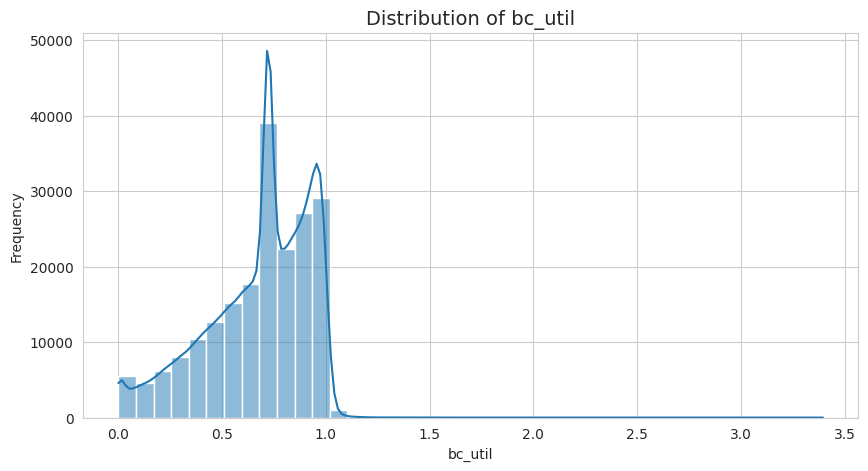

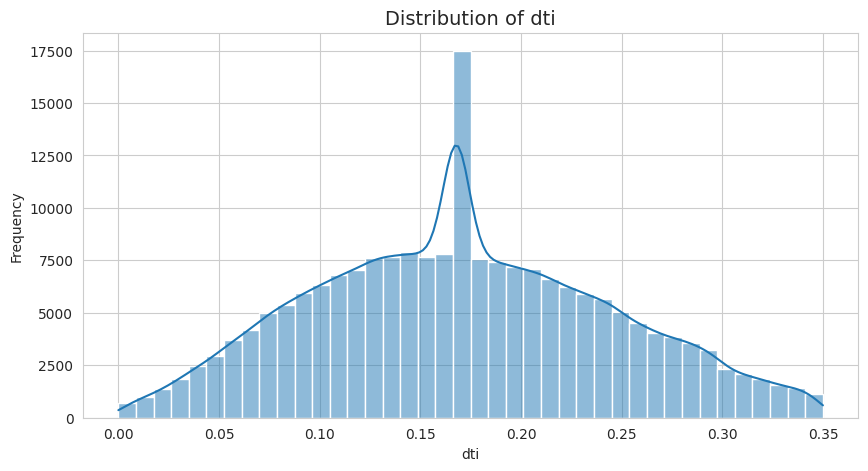

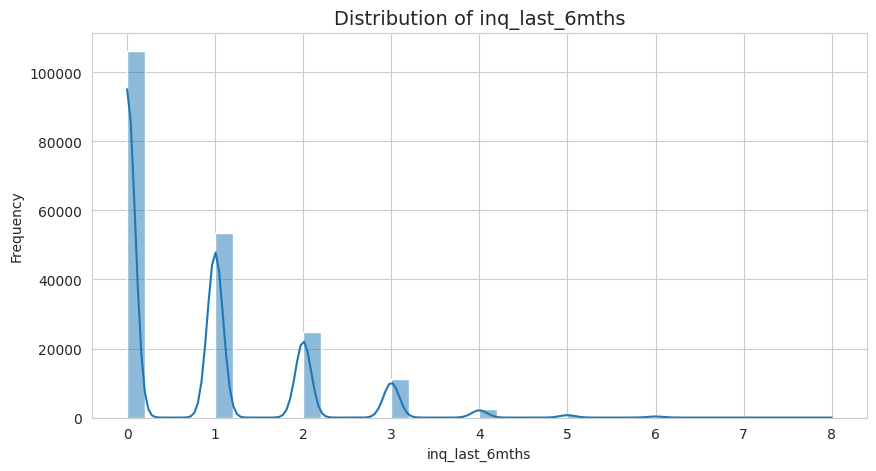

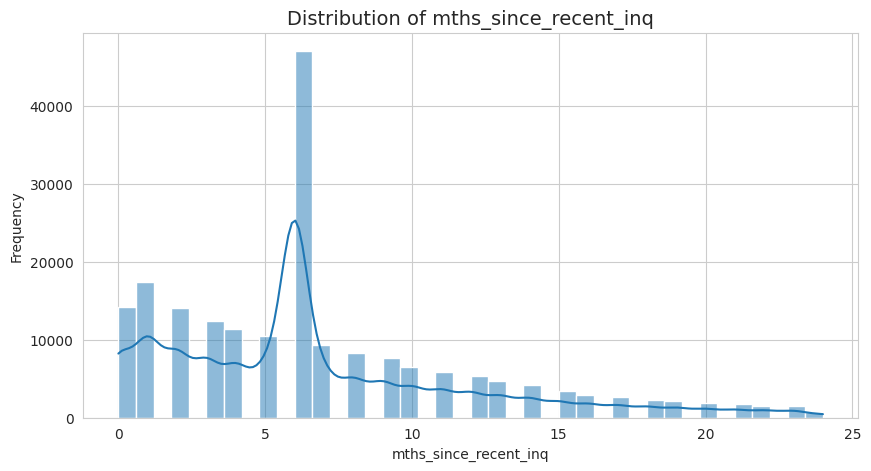

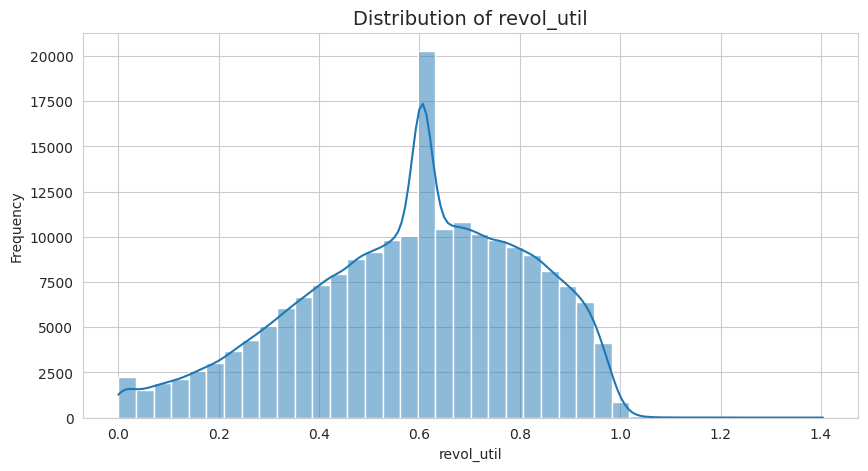

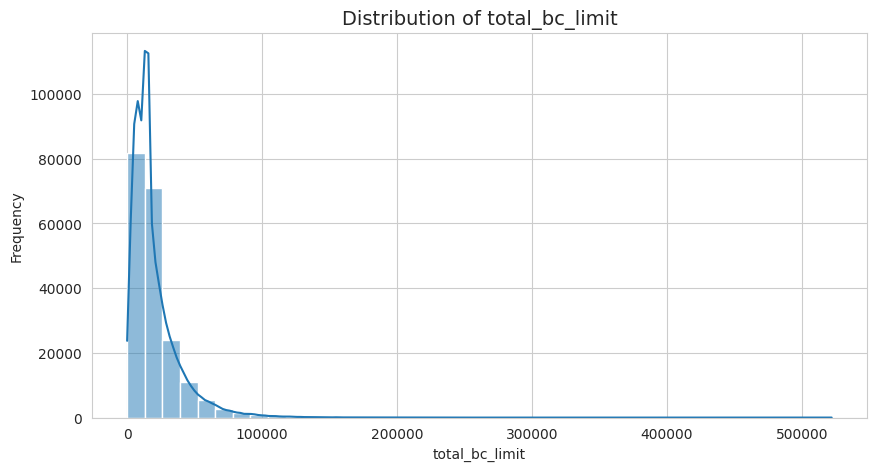

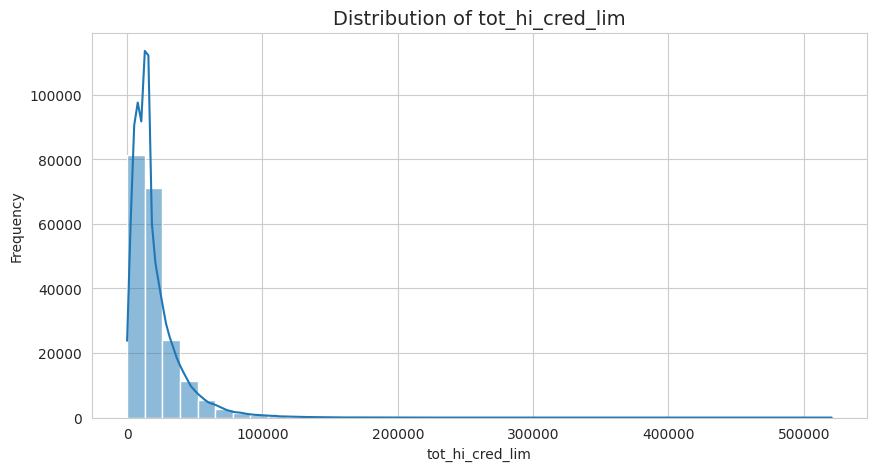

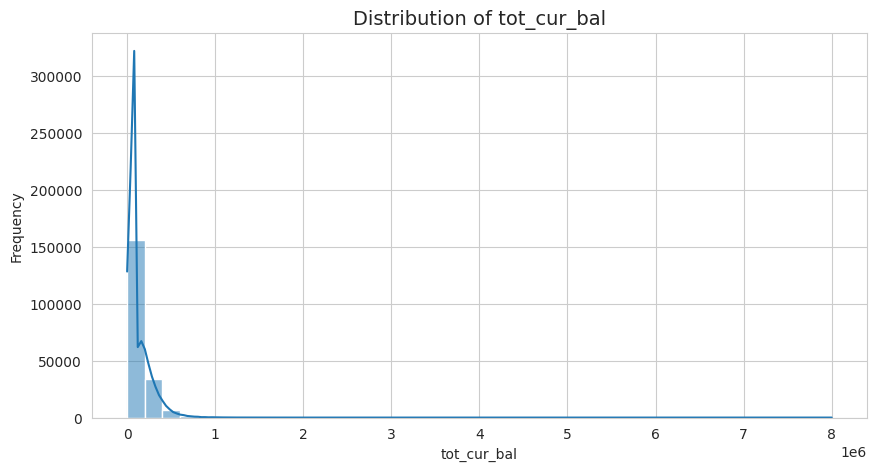

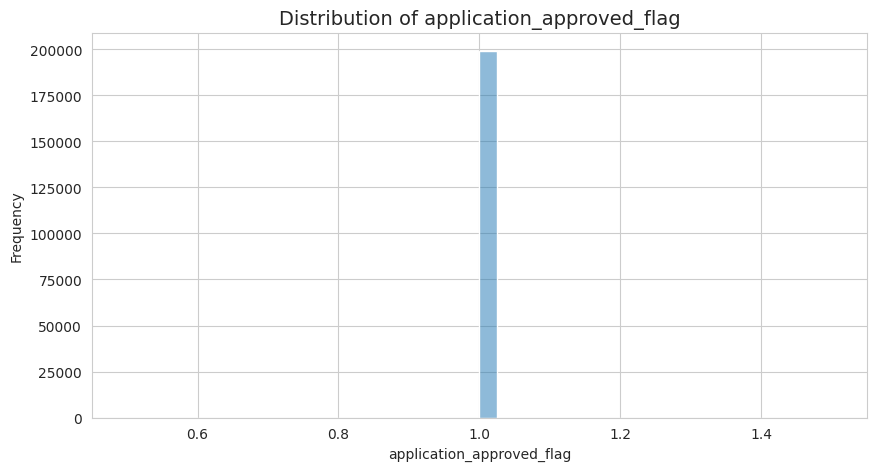

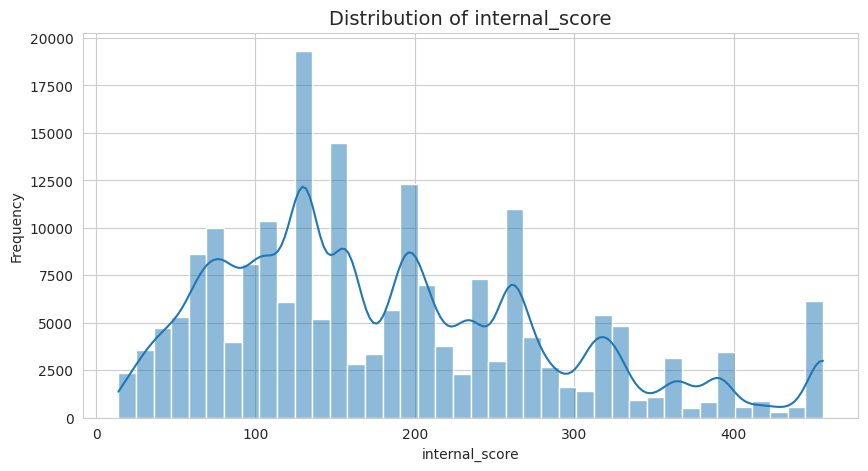


--- Categorical Variable Distributions ---


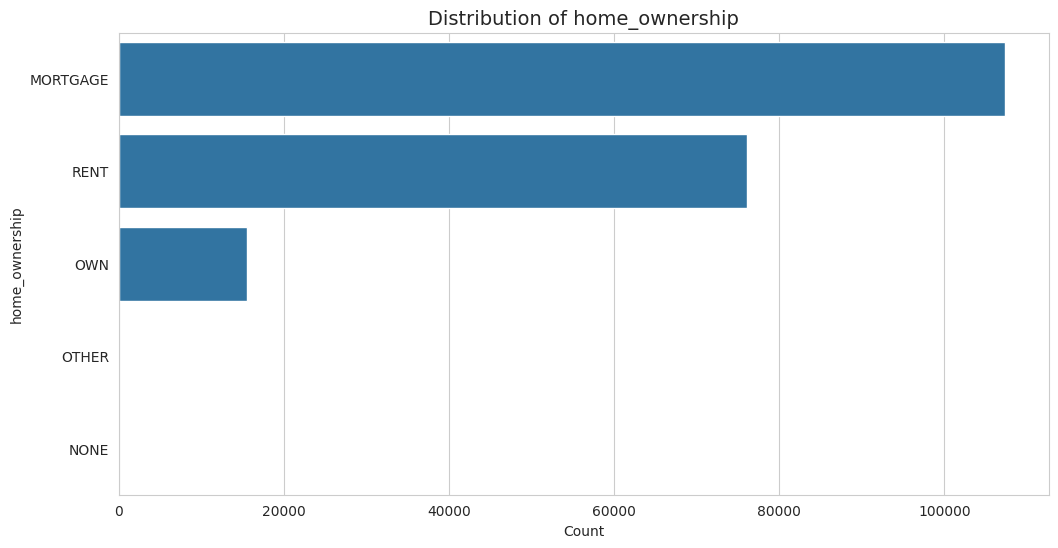

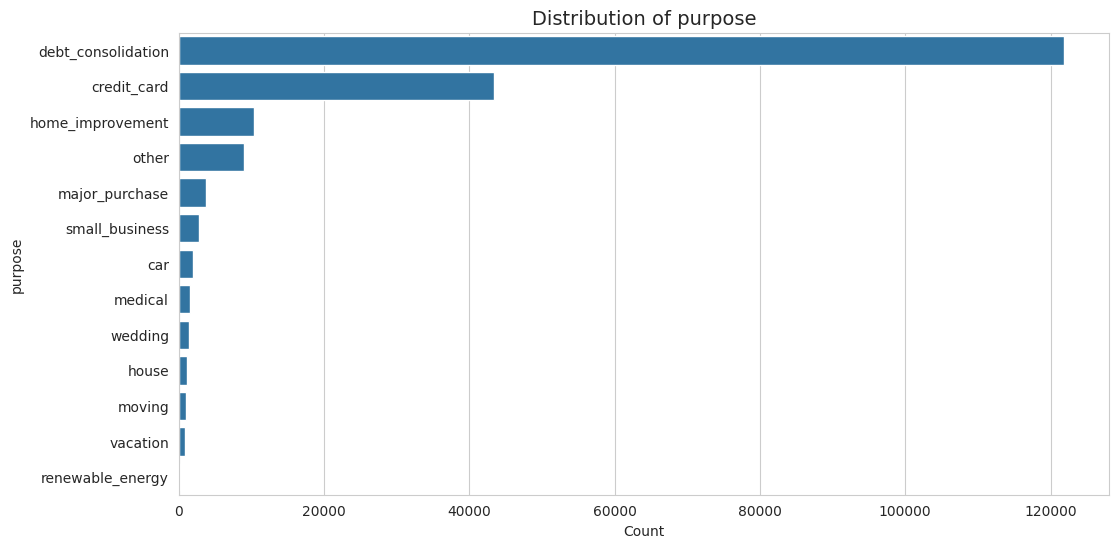

In [6]:
# Separate columns by data type for appropriate plotting
numerical_cols = loan_training.select_dtypes(include=np.number).columns.tolist()
categorical_cols = loan_training.select_dtypes(include=['object']).columns.tolist()

# Remove ID columns and the target variable as their distribution is not the focus here
numerical_cols.remove('id')
numerical_cols.remove('member_id')
if 'bad_flag' in numerical_cols:
    numerical_cols.remove('bad_flag')


# --- Plotting Numerical Variable Distributions ---
print("\n--- Numerical Variable Distributions ---")
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(loan_training[col], kde=True, bins=40)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# --- Plotting Categorical Variable Distributions ---
print("\n--- Categorical Variable Distributions ---")
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=loan_training[col], order=loan_training[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

####**Findings from Univariate Analysis**
The Typical Applicant Profile
The data suggests the average applicant is a homeowner with a mortgage, earning between 40K and 80K USD annually. It looks like that most of them are seeking a 10K to 15K USD loan for debt consolidation, preferring a shorter 36-month repayment term.

Key Financial Indicators

* They tend to have high credit utilization (often over 60%), which aligns with their stated goal of consolidating debt.

* However, they are generally not actively seeking new lines of credit, as most have zero credit inquiries in the last six months.

* Their Debt-to-Income (DTI) ratio is typically in a manageable 15-25% range.


##Bivariate Analysis


--- Numerical Variables vs. Bad Flag ---


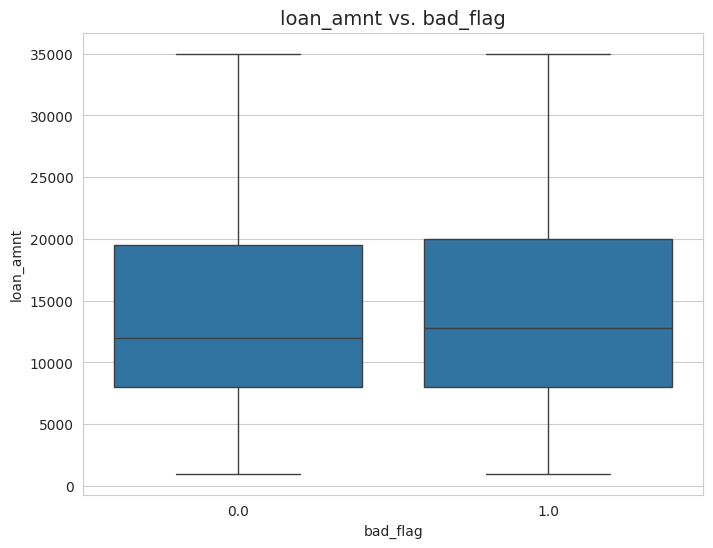

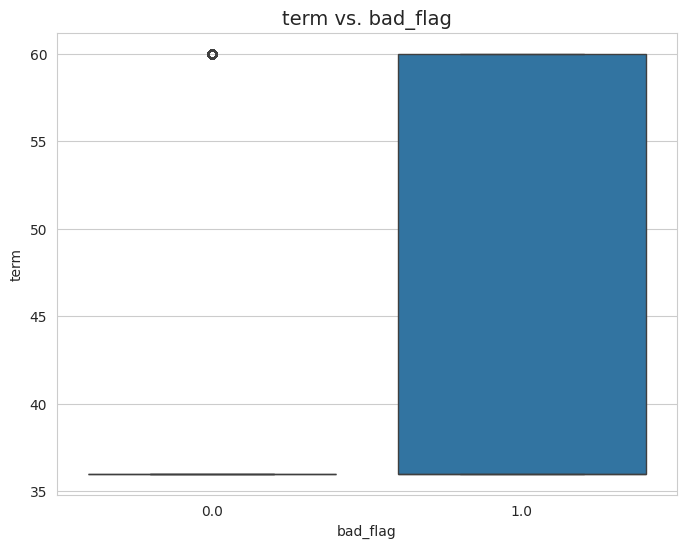

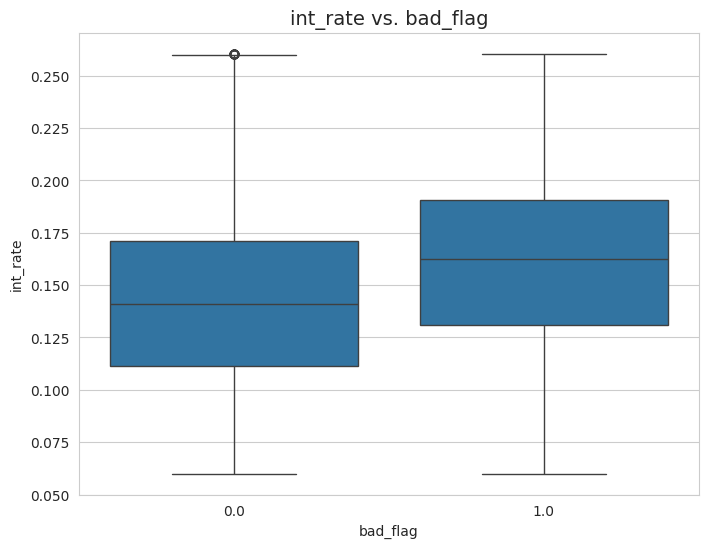

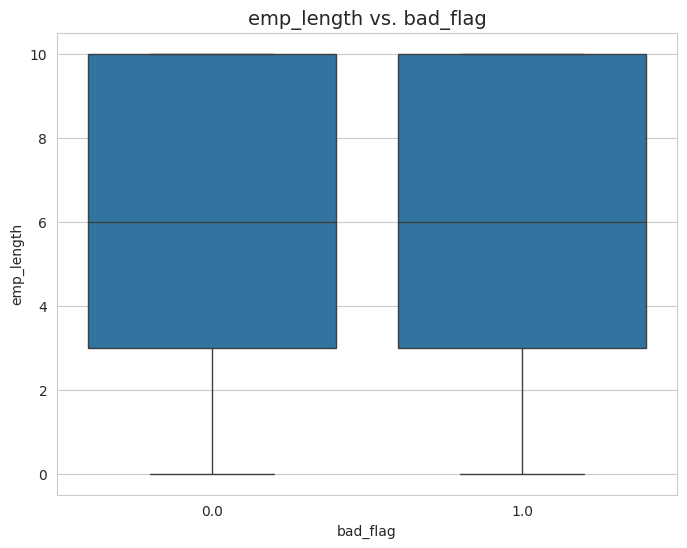

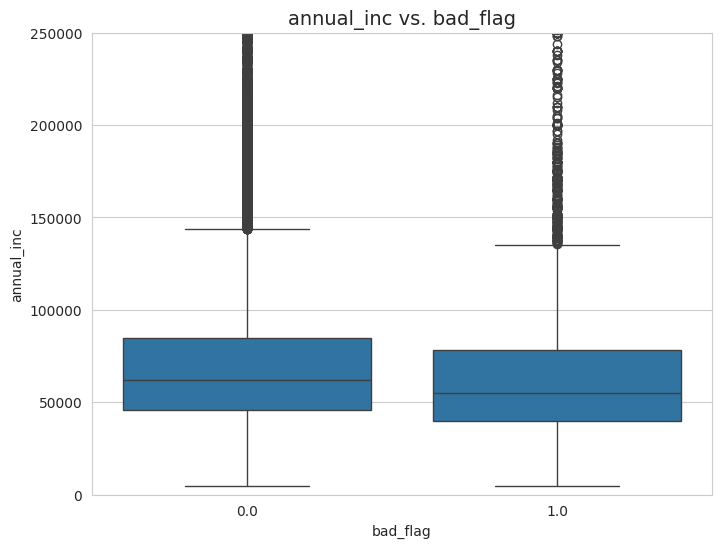

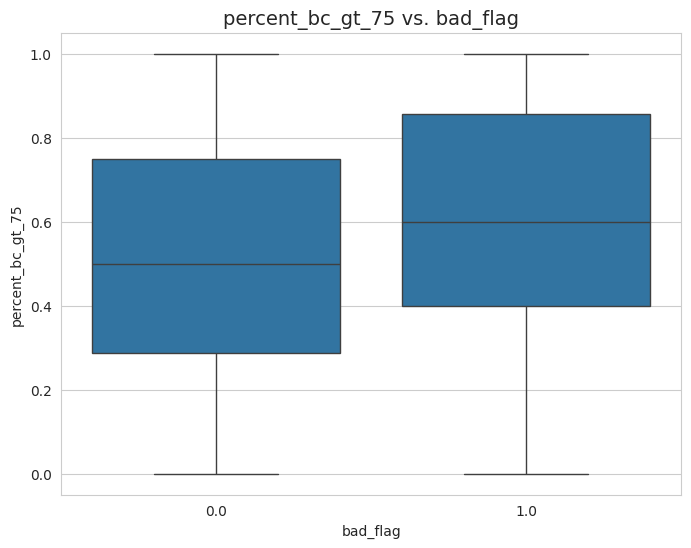

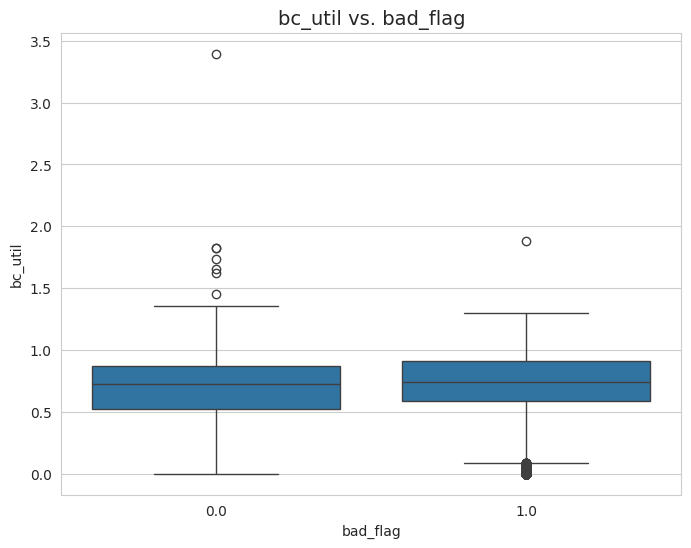

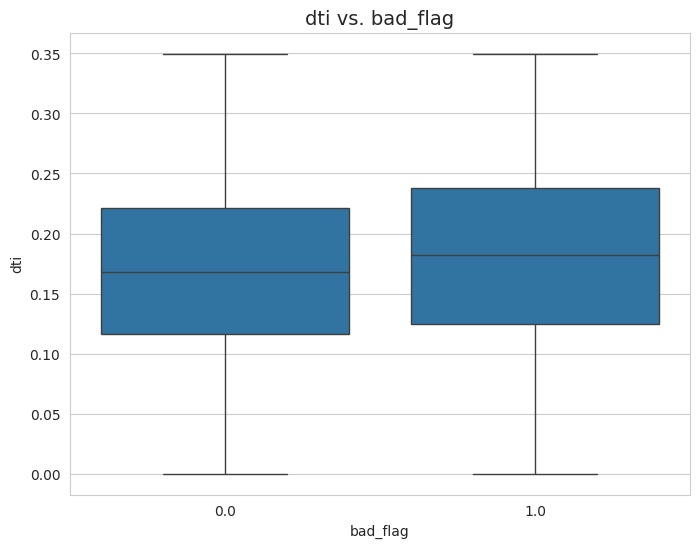

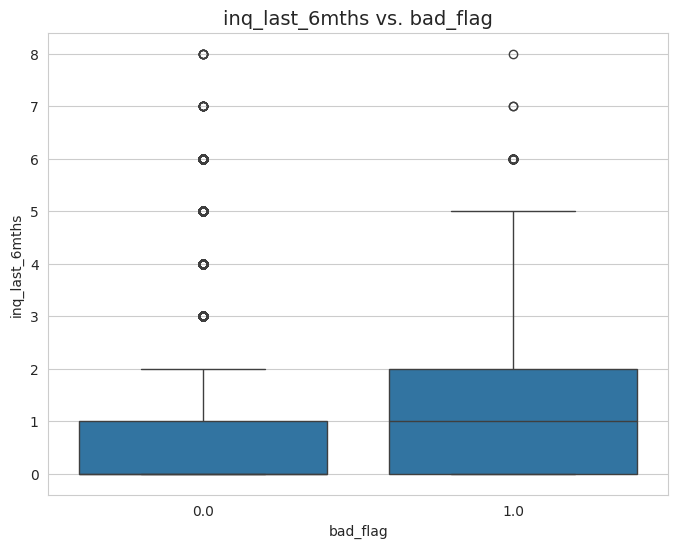

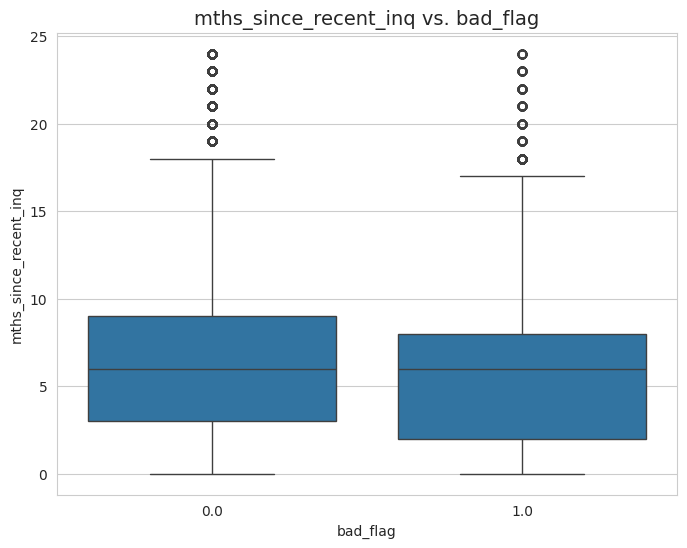

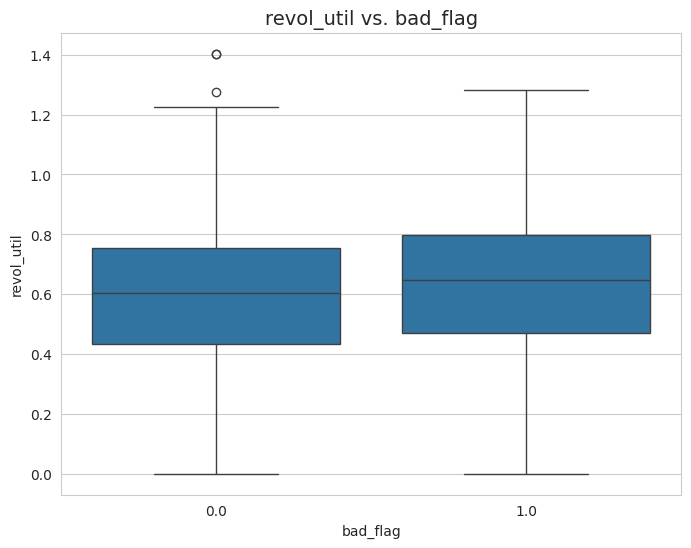

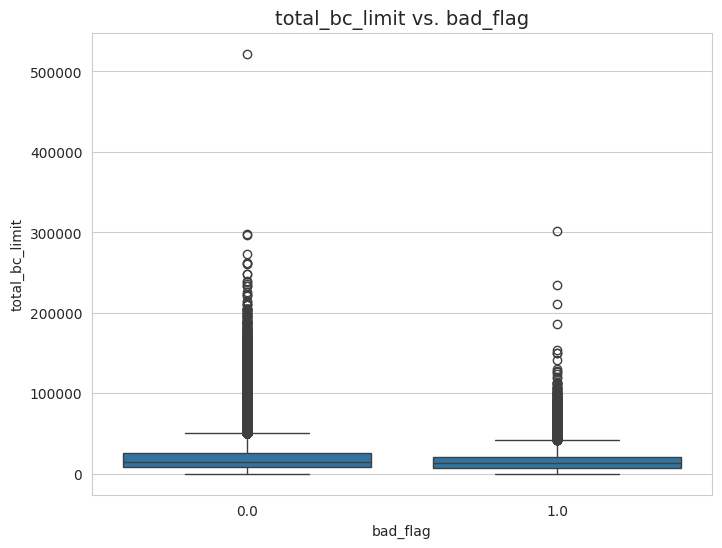

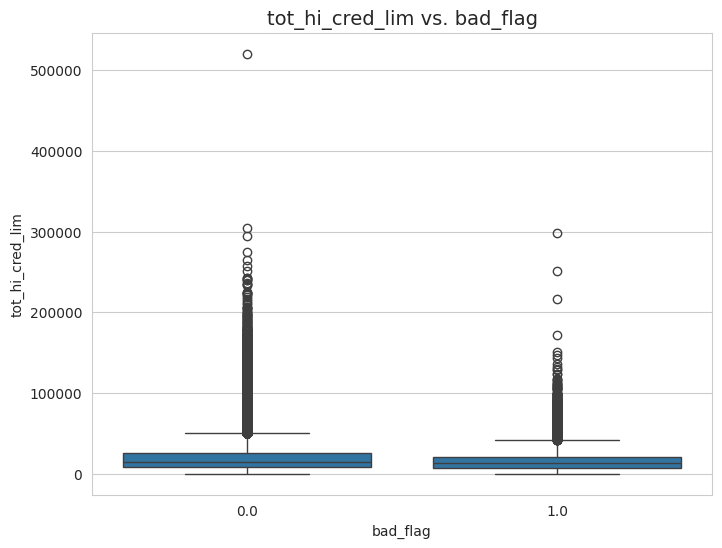

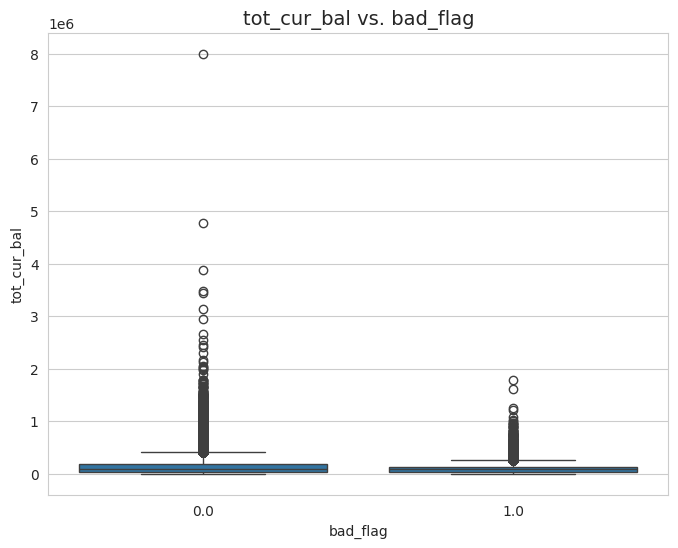

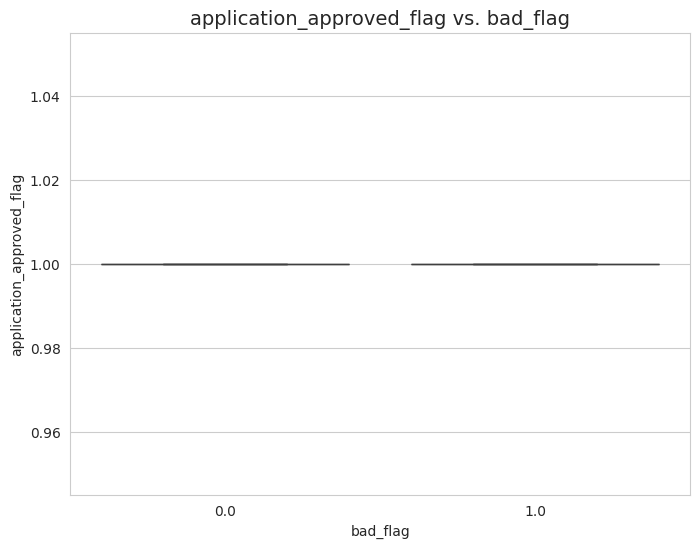

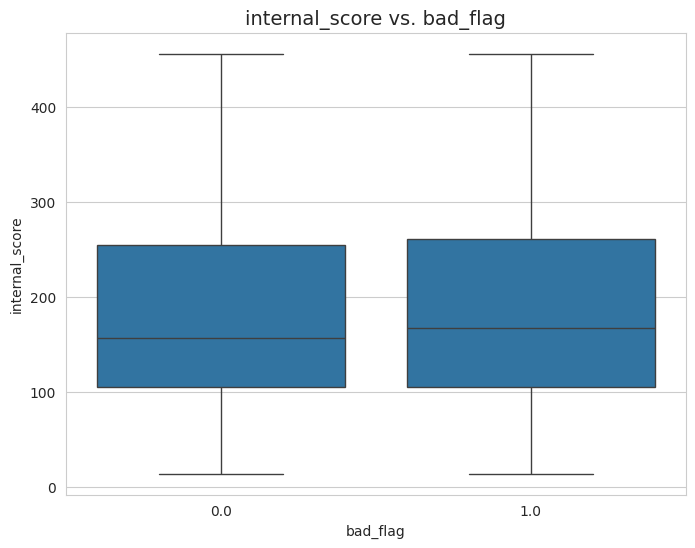


--- Categorical Variables vs. Bad Flag ---


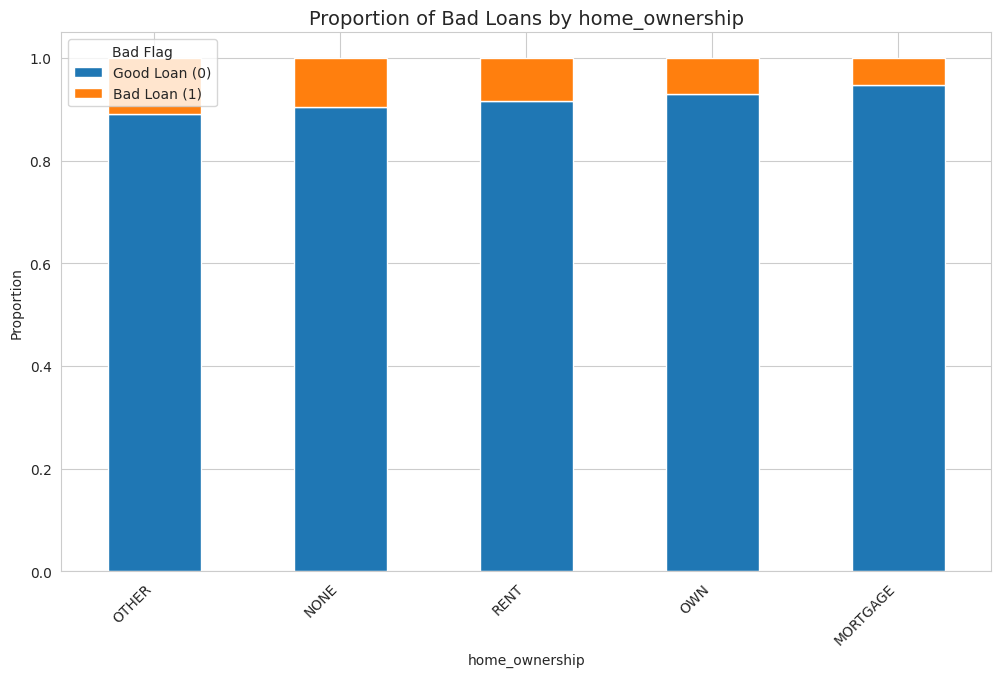

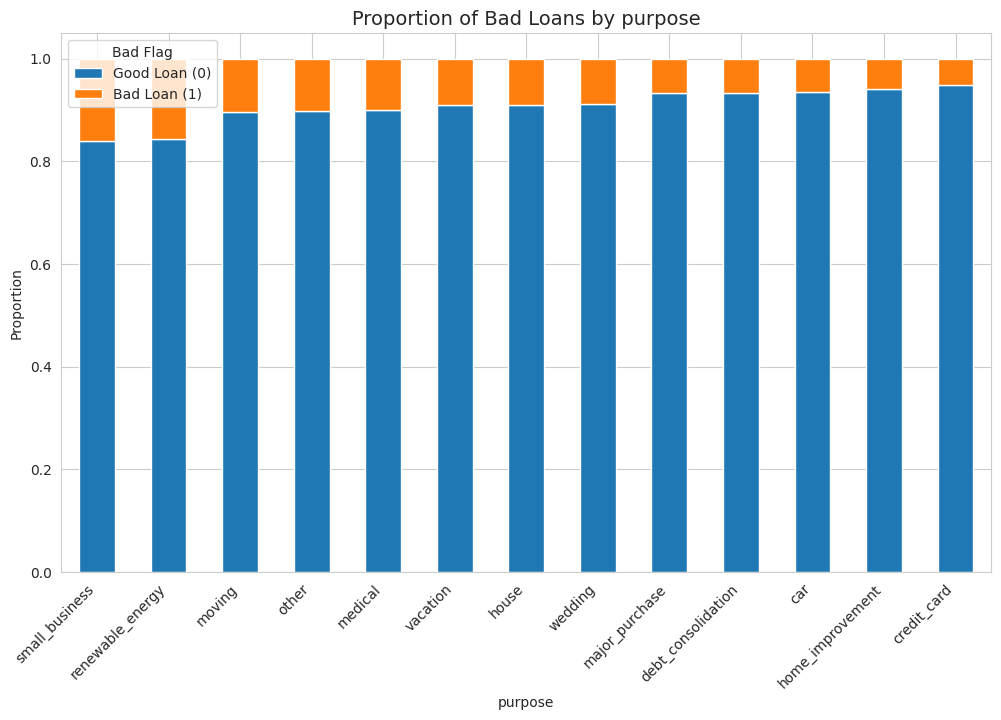

In [7]:
# The target variable is 'bad_flag'
target = 'bad_flag'

# --- Plotting Numerical Variables vs. Target ---
# We use box plots to see how the distribution of a numerical variable differs between good and bad loans.
print("\n--- Numerical Variables vs. Bad Flag ---")
for col in numerical_cols:
    # Capping annual_inc for better visualization
    if col == 'annual_inc':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target, y=col, data=loan_training)
        plt.title(f'{col} vs. {target}', fontsize=14)
        plt.ylim(0, 250000) # Apply the cap
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target, y=col, data=loan_training)
        plt.title(f'{col} vs. {target}', fontsize=14)
        plt.show()


# --- Plotting Categorical Variables vs. Target ---
# We use stacked bar charts to see the proportion of good/bad loans within each category.
print("\n--- Categorical Variables vs. Bad Flag ---")
for col in categorical_cols:
    # Create a cross-tabulation of proportions
    crosstab = pd.crosstab(loan_training[col], loan_training[target], normalize='index')
    crosstab.sort_values(by=1, ascending=False, inplace=True) # Sort by proportion of bad loans

    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title(f'Proportion of Bad Loans by {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Bad Flag', labels=['Good Loan (0)', 'Bad Loan (1)'])
    plt.show()

####**Findings from Bivariate Analysis**

* Interest Rate (int_rate) is the strongest predictor. Bad loans consistently have significantly higher interest rates than good loans.

* Home ownership also split the risk as people who own or have mortgages tend to have less possibilities on loan defaults

* Loan Purpose (purpose) is a key risk splitting factor. Small business loans have the highest default rate, while purposes like credit_card refinancing are safer.

* Other financial health indicators also contribute. Bad loans are generally associated with slightly lower annual incomes, higher Debt-to-Income (DTI) ratios, and higher credit utilization.

* The bivariate analysis points to a clearer risk split, with the assigned interest rate and the reason for the loan being the most important features for predicting default.


##Correlation Matrix

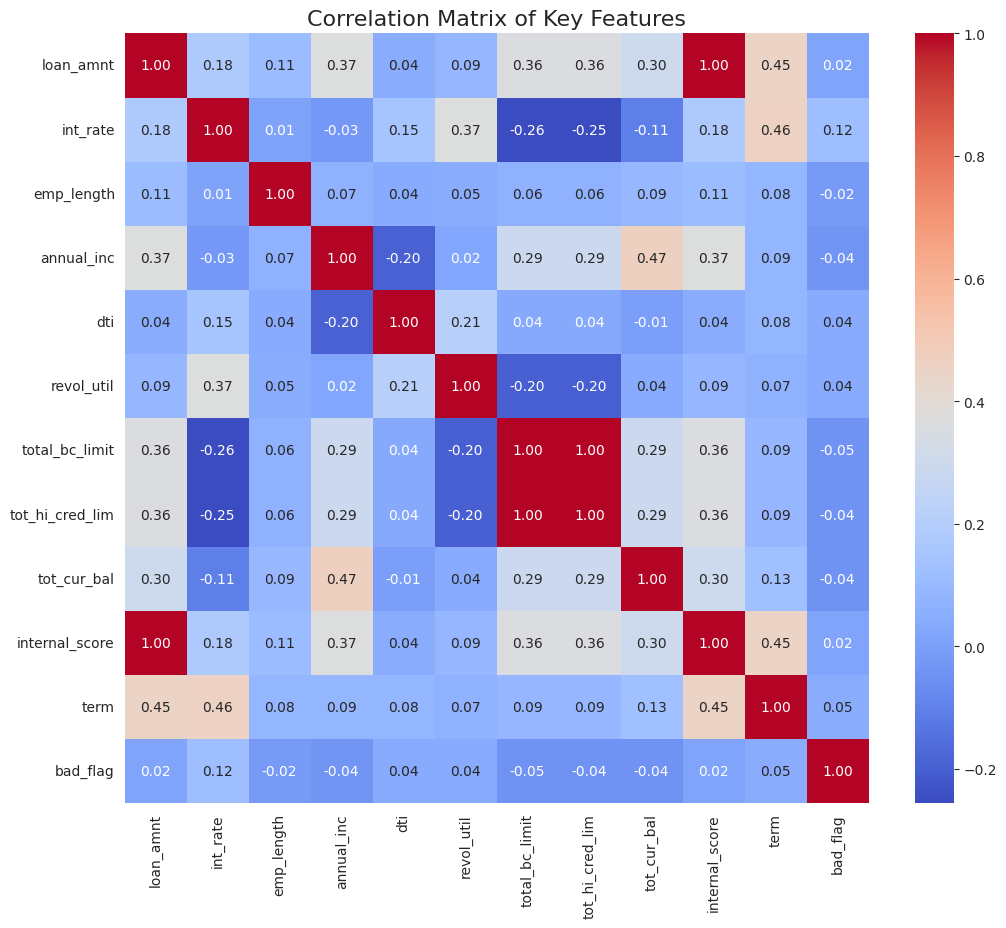

--- Pairs with High Correlation (Absolute Value > 0.7) ---
loan_amnt        internal_score     0.999998
internal_score   loan_amnt          0.999998
tot_hi_cred_lim  total_bc_limit     0.996485
total_bc_limit   tot_hi_cred_lim    0.996485
dtype: float64


In [15]:
# Expand the list of columns to include the internal_score
corr_cols = [
    'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
    'revol_util', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal',
    'internal_score', 'term', 'bad_flag'
]
corr_matrix = loan_training[corr_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.show()

# Identify and print pairs with high correlation (excluding self-correlation)
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1] # Remove self-correlations
print("--- Pairs with High Correlation (Absolute Value > 0.7) ---")
print(high_corr_pairs[abs(high_corr_pairs) > 0.7])

####Findings From the Correlation Matrix
* Interest Rate is the strongest predictor of bad loans (loan deliquency or default): int_rate has the strongest correlation with bad_flag at +0.12. This remains the most important finding for our model: higher interest rates are the best linear indicator of a loan going bad.
* High Incomers tend to borrow more with higher current balances
* Internal scores tend to consider the term as a significant risk factor given their strong linear relationship

##Multivariate Analysis: Income, Interest Rate, Home Ownership, and Bad Flag

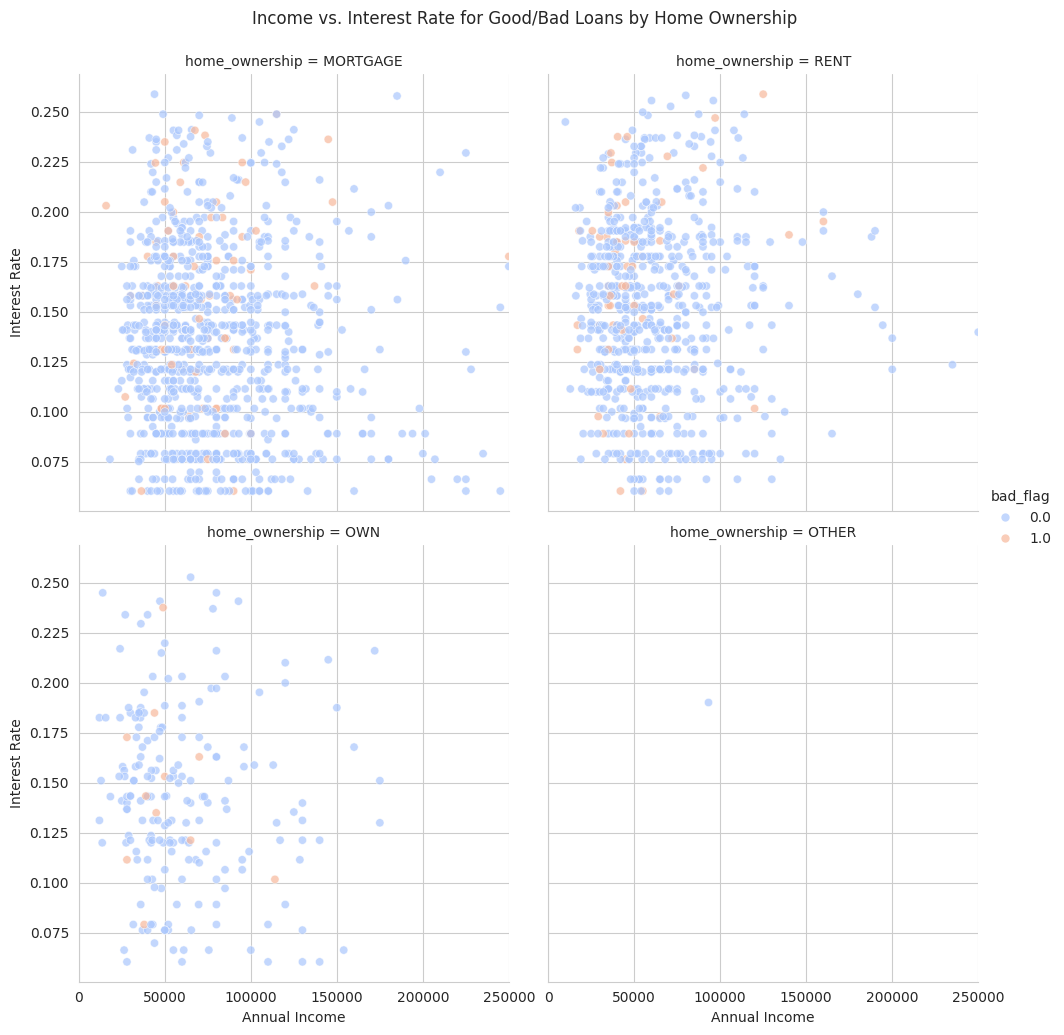

In [9]:
loan_training_sample = loan_training.sample(n=2000, random_state=42)
g = sns.relplot(
    data=loan_training_sample,
    x='annual_inc',
    y='int_rate',
    hue='bad_flag',
    col='home_ownership',
    col_wrap=2,
    alpha=0.7,
    palette='coolwarm'
)
g.fig.suptitle('Income vs. Interest Rate for Good/Bad Loans by Home Ownership', y=1.03)
g.set_xlabels('Annual Income')
g.set_ylabels('Interest Rate')
g.set(xlim=(0, 250000))
plt.show()

##Multivariate Analysis: Loan Amount, Loan Purpose, and Bad Flag


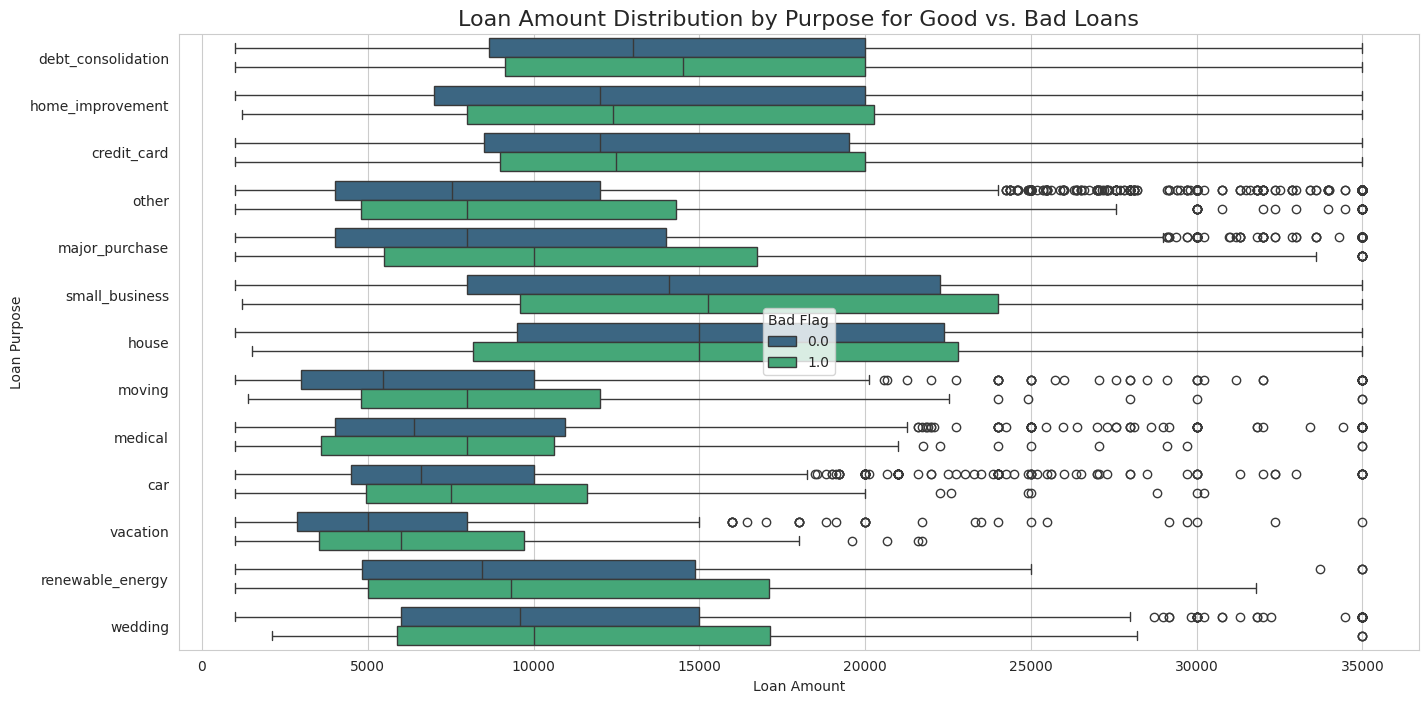

In [19]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=loan_training,
    x='loan_amnt',
    y='purpose',
    hue='bad_flag',
    orient='h',
    palette='viridis'
)
plt.title('Loan Amount Distribution by Purpose for Good vs. Bad Loans', fontsize=16)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')
plt.legend(title='Bad Flag')
plt.show()

##Multivariate Analysis: DTI, Interest Rate, Loan Term, and Bad Flag


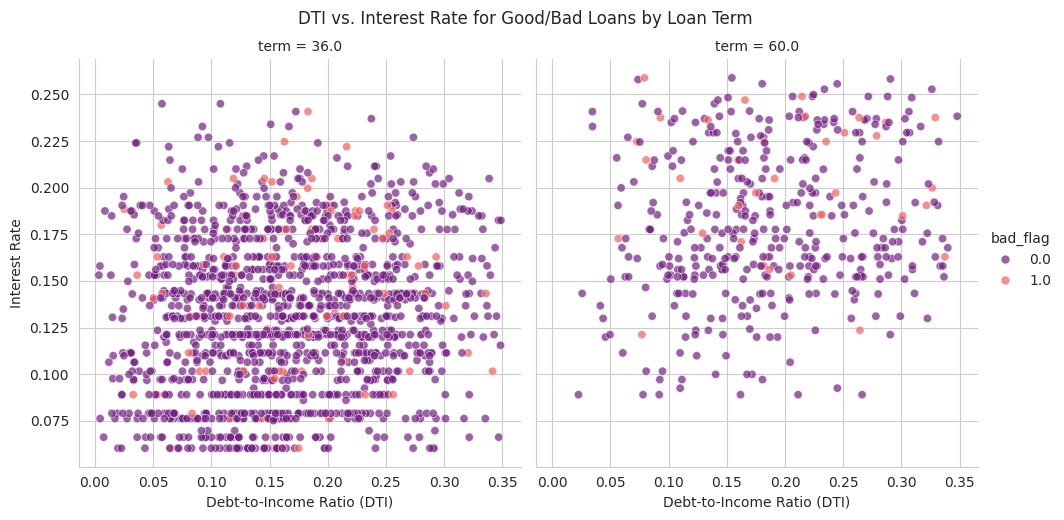

In [11]:
g = sns.relplot(
    data=loan_training_sample, # Using the same sample
    x='dti',
    y='int_rate',
    hue='bad_flag',
    col='term', # Facet by 36 vs 60 month term
    palette='magma',
    alpha=0.7
)
g.fig.suptitle('DTI vs. Interest Rate for Good/Bad Loans by Loan Term', y=1.03)
g.set_xlabels('Debt-to-Income Ratio (DTI)')
g.set_ylabels('Interest Rate')
plt.show()

####**Findings from Multivariate Analysis**
* Bad loans are generally asoociated with higher interest rate
* Loan default is connected to multiple purchase reasons, but the small business loans expose to higher risk as the default amount is highest across all purposes

##Additional Check: Loan Term and Bad Flags

In [20]:
# Group by 'term' and calculate the mean of 'bad_flag' (the default rate)
risk_by_term = loan_training.groupby('term')['bad_flag'].mean().reset_index()
risk_by_term.rename(columns={'bad_flag': 'default_rate'}, inplace=True)

# Format as a percentage for clarity
risk_by_term['default_rate'] = (risk_by_term['default_rate'] * 100).round(2).astype(str) + '%'

print("Default Rate by Loan Term:")
print(risk_by_term)

Default Rate by Loan Term:
   term default_rate
0  36.0        5.99%
1  60.0        8.67%


##Recommendations for Actions
* Internal scores seem not to be able to predict the bad loans well. The modeling needs to repivot the focus on interest rate, purpose of loans, and home ownership.
* It's highly recommended to re-evaluate the effectiveness of internal scores from the third party vendor, and find how the risk could be captured at the loan application stage, such as rebuilding a new internal model to capture the risk.